In [91]:
import warnings
warnings.filterwarnings("ignore")

import os
import time
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle as pkl
import matplotlib.pyplot as plt

import src
import parameters
from src.reload import deep_reload
from importlib import reload

In [92]:
figure_save_path='../sPHEV_Paper/Document/figs/'

In [152]:
deep_reload(src)
reload(parameters)

defaults=parameters.LoadDefaults()

In [332]:
deep_reload(src)
reload(parameters)

defaults=parameters.LoadDefaults()

models=[
    defaults['icev_cuv'],
    defaults['phev_cuv'],
    defaults['bev_cuv'],
]

inputs={
    'range_extension':['refuel','recharge','replace'],
    'model_year':list(range(2025,2036)),
    'all_electric_range':np.linspace(100,500,21)*1e3,
    'fuel_cost':np.linspace(2,6,21)/33.7/3.6e6,
}

outputs=[
    'total',
    'purchase',
    'operation',
    'energy',
    'battery',
]

results=src.cost.InputsFactorial(models,inputs,outputs,disp=True)

 Progress [------------------->] (14553/14553) 100%, 5328.72 it/s, 2.73 seconds elapsed, -0.00 seconds remaining         



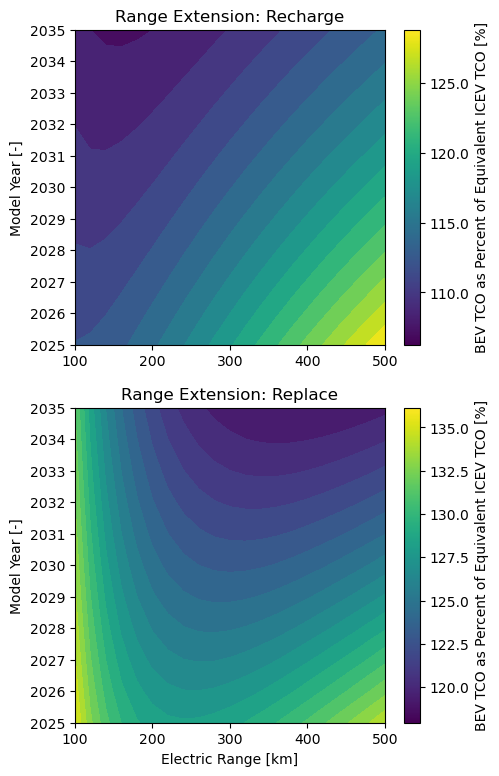

In [333]:
deep_reload(src)

# fig,ax=plt.subplots(1,2,figsize=(14,5))
fig,ax=plt.subplots(2,1,figsize=(5,9))

x=inputs['all_electric_range']/1e3
y=inputs['model_year']
gas=5

contourf_kwargs={
    'levels':20,
}

colorbar_kwargs={
    'label':'BEV TCO as Percent of Equivalent ICEV TCO [%]',
    'format':"{x:.1f}",
}

cmap=src.figures.ReturnColorMap('viridis')

z=((results[2]['total'][1,:,:,gas]-results[0]['total'][0,:,:,gas])/
   results[0]['total'][0,:,:,gas]*100+100)
src.figures.PlotContour(
    x,y,z,ax=ax[0],cmap=cmap,
    contourf_kwargs=contourf_kwargs,
    colorbar_kwargs=colorbar_kwargs,
)

# ax.yaxis.set_major_formatter('${x:1.2f}')
ax[0].set_title('Range Extension: Recharge')
# ax[0].set_xlabel('Electric Range [km]')
ax[0].set_ylabel('Model Year [-]')
ax[0].set_yticks(inputs['model_year'])

z=((results[2]['total'][2,:,:,gas]-results[0]['total'][0,:,:,gas])/
   results[0]['total'][0,:,:,gas]*100+100)

src.figures.PlotContour(
    x,y,z,ax=ax[1],cmap=cmap,
    contourf_kwargs=contourf_kwargs,
    colorbar_kwargs=colorbar_kwargs,
)

# ax.yaxis.set_major_formatter('${x:1.2f}')
ax[1].set_title('Range Extension: Replace')
ax[1].set_xlabel('Electric Range [km]')
ax[1].set_ylabel('Model Year [-]')
ax[1].set_yticks(inputs['model_year'])

fig.savefig(figure_save_path+'Recharge_Replace.png',bbox_inches='tight')

In [334]:
deep_reload(src)
reload(parameters)

defaults=parameters.LoadDefaults()

models=[
    defaults['icev_cuv'],
    defaults['phev_cuv'],
]

inputs_phev={
    'model_year':list(range(2025,2036)),
    'all_electric_range':np.linspace(20,160,61)*1e3,
    # 'fuel_cost':np.linspace(2,6,21)/33.7/3.6e6,
}

outputs=[
    'total',
    'purchase',
    'operation',
    'energy',
    'battery',
]

results_phev=src.cost.InputsFactorial(models,inputs_phev,outputs,disp=True)

 Progress [------------------->] (671/671) 100%, 7896.22 it/s, 0.09 seconds elapsed, -0.00 seconds remaining         



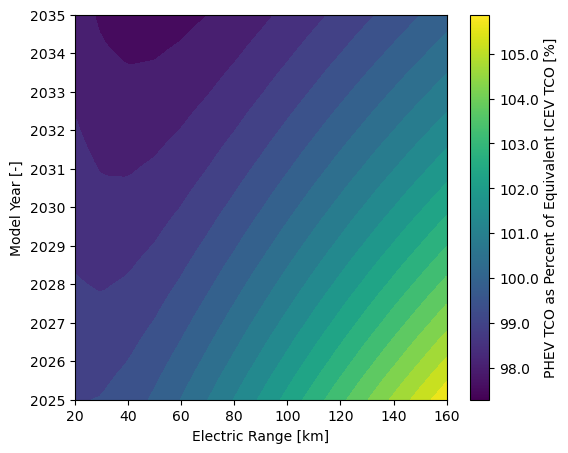

In [337]:
deep_reload(src)

fig,ax=plt.subplots(1,1,figsize=(6,5))
if not hasattr(ax,'__iter__'):
    ax=[ax]

gas=5
field='total'

x=inputs_phev['all_electric_range']/1e3
y=inputs_phev['model_year']


contourf_kwargs={
    'levels':20,
}

colorbar_kwargs={
    'label':'PHEV TCO as Percent of Equivalent ICEV TCO [%]',
    'format':"{x:.1f}",
}

cmap=src.figures.ReturnColorMap('viridis')

z=results_phev[1][field][:,:]/results_phev[0][field][:,:]*100
# z=results_phev[0][field][:,:]

src.figures.PlotContour(
    x,y,z,ax=ax[0],cmap=cmap,
    contourf_kwargs=contourf_kwargs,
    colorbar_kwargs=colorbar_kwargs,
)

# ax.yaxis.set_major_formatter('${x:1.2f}')
# ax[0].set_title('Range Extension: Refuel')
ax[0].set_xlabel('Electric Range [km]')
ax[0].set_ylabel('Model Year [-]')
_=ax[0].set_yticks(inputs_phev['model_year'])

fig.savefig(figure_save_path+'PHEV_Refuel.png',bbox_inches='tight')

In [ ]:
deep_reload(src)

def ReturnDataDict(models,fields):
    
    data_dict={}

    for field,field_name in fields.items():
        data_dict[field_name]=[]
        for key in models.keys():
            # print(key)
            data_dict[field_name].append(models[key].costs[field])
    
    return data_dict

In [ ]:
deep_reload(src)

def PadFieldNames(fields_all):
    
    field_name_lengths=[]
    
    for fields in fields_all:
        for val in fields.values():
        
            field_name_lengths.append(len(val))
    
    str_len=max(field_name_lengths)
    
    return str_len

In [303]:
deep_reload(src)
reload(parameters)

models=LoadDefaults({'model_year':2025})

_=[models.pop(key) for key in tco.keys() if 'hev'==key[:3]]

fields_purchase={
    'battery':'Battery',
    'engine':'Engine',
    'motor':'Motor',
    'gearset':'Gearset',
    'wiring':'Wiring',
    'chassis':'Chassis',
    'oem_profit':'OEM Profit',
    'dealer_profit':'Dealer Profit',
    'tax':'Tax',
}

data_purchase=ReturnDataDict(models,fields_purchase)

fields_operation={
    'energy':'Energy',
    'maintenance':'Maintenance',
    'replacement':'Replacement',
    'registration':'Registration',
    'insurance':'Insurance',
}

data_operation=ReturnDataDict(models,fields_operation)

fields_tco={
    'components':'Components',
    'margin':'Margin',
    'tax':'Tax',
    'energy':'Energy',
    'maintenance':'Maintenance',
    'other':'Other'
}

data_tco=ReturnDataDict(models,fields_tco)

fields_all=[fields_purchase,fields_operation,fields_tco]
str_len=PadFieldNames(fields_all)
str_len

13

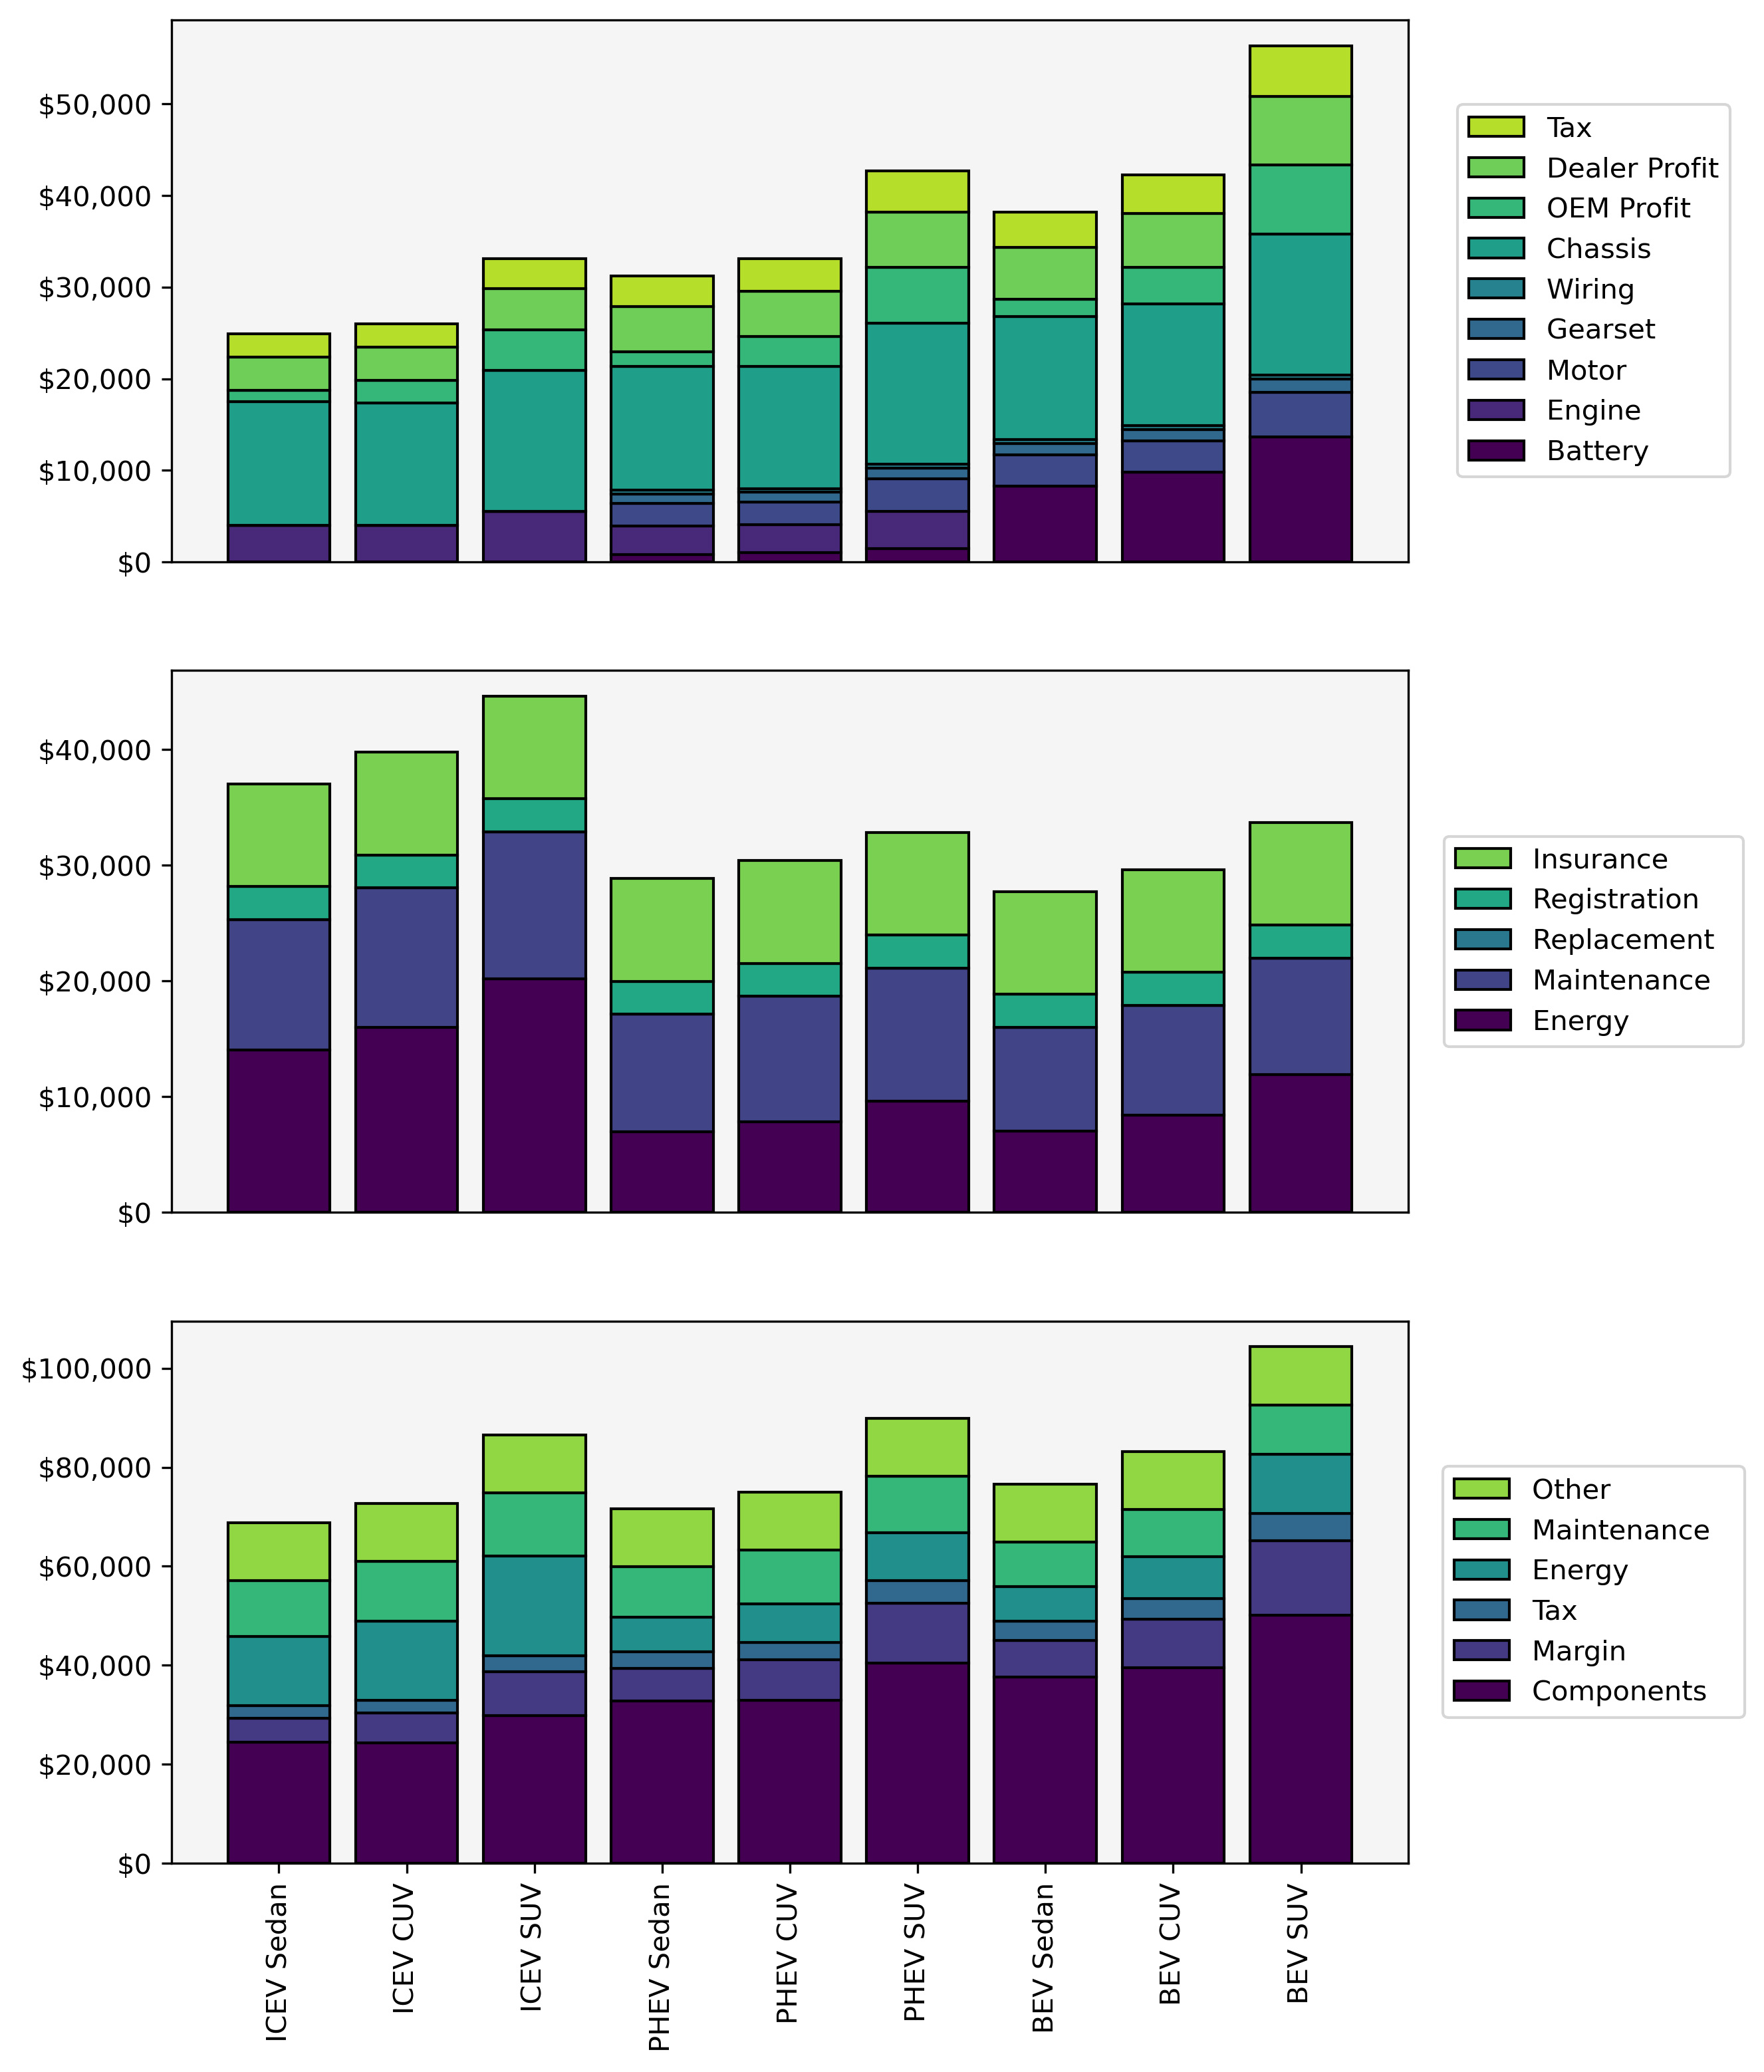

In [304]:
deep_reload(src)  

fig,ax=plt.subplots(3,1,figsize=(8,12),dpi=300)

bar_kwargs={
    'ec':'k',
}

legend_kwargs={
    'bbox_to_anchor':(1.15,.5),
    'loc':'center',
}

labels=([f'{pt} {cs}' for pt in ['ICEV','PHEV','BEV']\
                   for cs in ['Sedan','CUV','SUV']])

src.figures.PlotStackedBar(
    data_purchase,ax=ax[0],
    axes_kwargs=axes_kwargs,
    legend_kwargs=legend_kwargs,
    bar_kwargs=bar_kwargs,
    legend_pad=str_len)

_=ax[0].set_xticks([])
ax[0].yaxis.set_major_formatter('${x:,.0f}')
ax[0].set_facecolor('whitesmoke')

src.figures.PlotStackedBar(
    data_operation,ax=ax[1],
    axes_kwargs=axes_kwargs,
    legend_kwargs=legend_kwargs,
    bar_kwargs=bar_kwargs,
    legend_pad=str_len)

_=ax[1].set_xticks([])
ax[1].yaxis.set_major_formatter('${x:,.0f}')
ax[1].set_facecolor('whitesmoke')

src.figures.PlotStackedBar(
    data_tco,ax=ax[2],
    axes_kwargs=axes_kwargs,
    legend_kwargs=legend_kwargs,
    bar_kwargs=bar_kwargs,
    legend_pad=str_len)

_=ax[2].set_xticks(list(range(9)),labels,rotation=90)
ax[2].yaxis.set_major_formatter('${x:,.0f}')
ax[2].set_facecolor('whitesmoke')

# fig.savefig(figure_save_path+'Costs_2025_All.png',bbox_inches='tight')

In [253]:
deep_reload(src)

models=LoadDefaults({'model_year':2035})

_=[models.pop(key) for key in tco.keys() if 'hev'==key[:3]]

fields_purchase={
    'battery':'Battery',
    'engine':'Engine',
    'motor':'Motor',
    'gearset':'Gearset',
    'wiring':'Wiring',
    'chassis':'Chassis',
    'oem_profit':'OEM Profit',
    'dealer_profit':'Dealer Profit',
    'tax':'Tax',
}

data_purchase=ReturnDataDict(models,fields_purchase)

fields_operation={
    'energy':'Energy',
    'maintenance':'Maintenance',
    'replacement':'Replacement',
    'registration':'Registration',
    'insurance':'Insurance',
}

data_operation=ReturnDataDict(models,fields_operation)

fields_tco={
    'components':'Components',
    'margin':'Margin',
    'tax':'Tax',
    'energy':'Energy',
    'maintenance':'Maintenance',
    'other':'Other'
}

data_tco=ReturnDataDict(models,fields_tco)

fields_all=[fields_purchase,fields_operation,fields_tco]
str_len=PadFieldNames(fields_all)
str_len

13

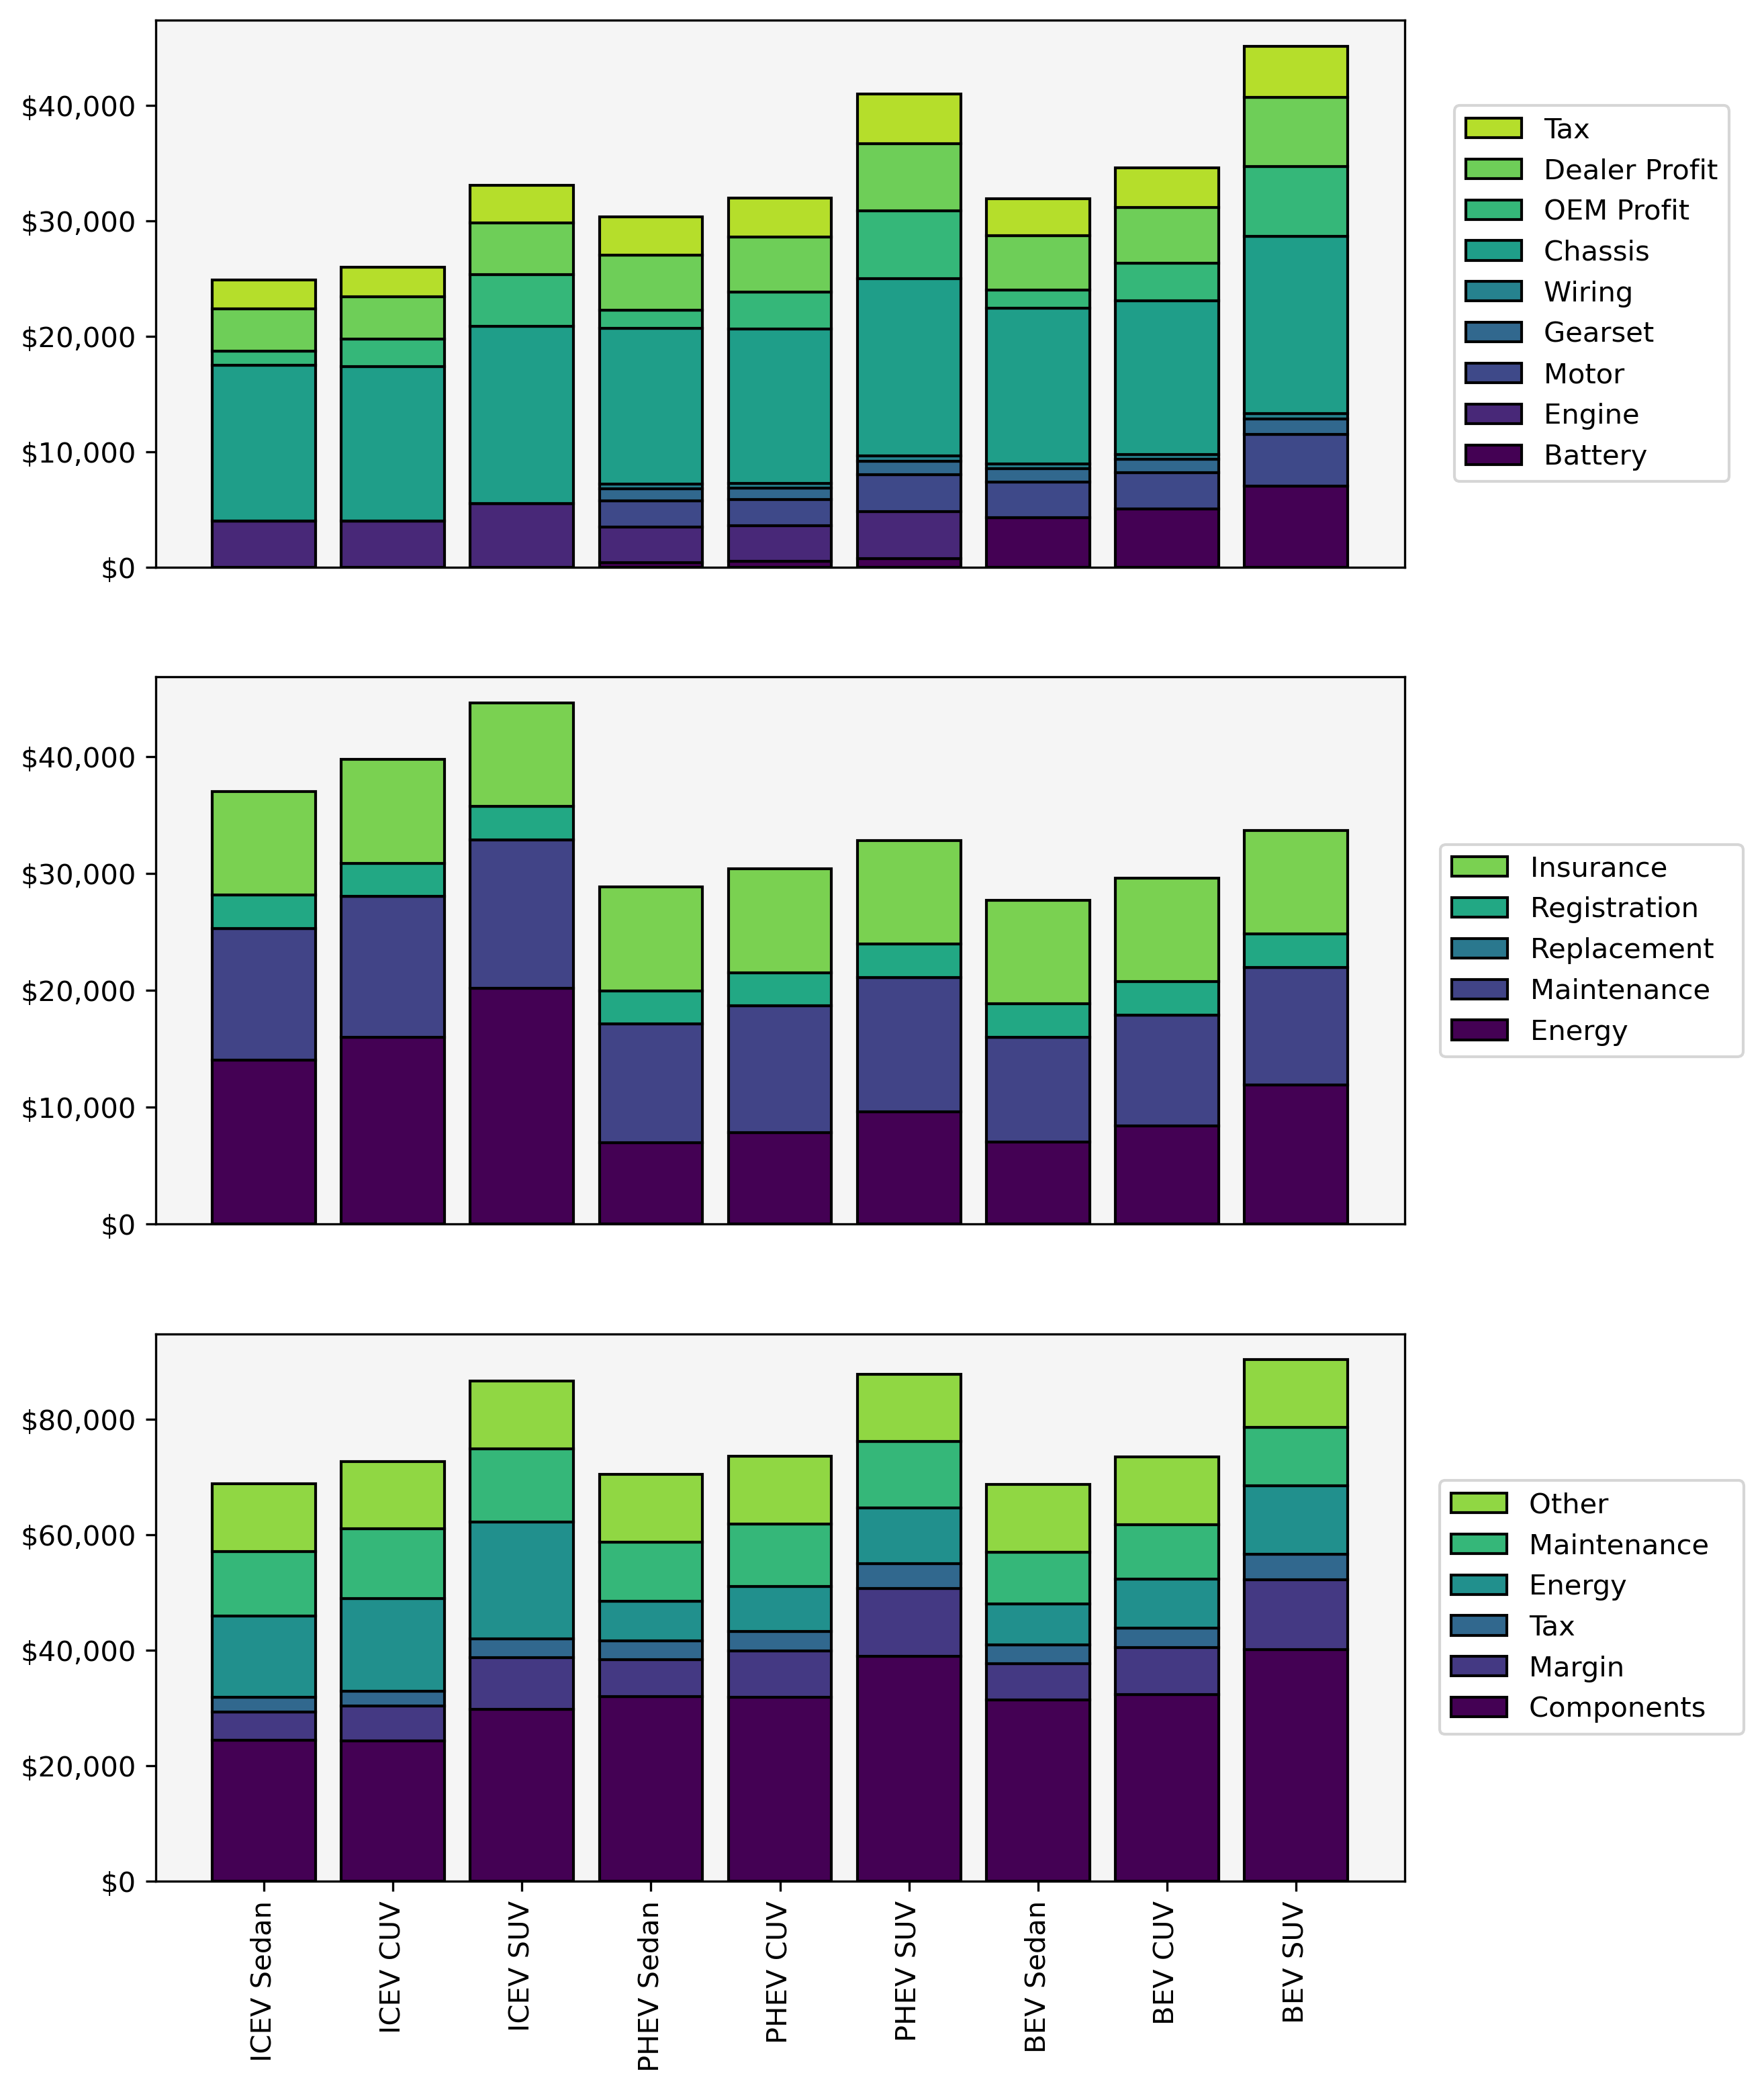

In [254]:
deep_reload(src)  

fig,ax=plt.subplots(3,1,figsize=(8,12),dpi=300)

axes_kwargs={
    # 'ylim':[0,110000],
}

bar_kwargs={
    'ec':'k',
}

legend_kwargs={
    'bbox_to_anchor':(1.15,.5),
    'loc':'center',
}

labels=([f'{pt} {cs}' for pt in ['ICEV','PHEV','BEV']\
                   for cs in ['Sedan','CUV','SUV']])

src.figures.PlotStackedBar(
    data_purchase,ax=ax[0],
    axes_kwargs=axes_kwargs,
    legend_kwargs=legend_kwargs,
    bar_kwargs=bar_kwargs,
    legend_pad=str_len)

_=ax[0].set_xticks([])
ax[0].yaxis.set_major_formatter('${x:,.0f}')
ax[0].set_facecolor('whitesmoke')

src.figures.PlotStackedBar(
    data_operation,ax=ax[1],
    axes_kwargs=axes_kwargs,
    legend_kwargs=legend_kwargs,
    bar_kwargs=bar_kwargs,
    legend_pad=str_len)

_=ax[1].set_xticks([])
ax[1].yaxis.set_major_formatter('${x:,.0f}')
ax[1].set_facecolor('whitesmoke')

src.figures.PlotStackedBar(
    data_tco,ax=ax[2],
    axes_kwargs=axes_kwargs,
    legend_kwargs=legend_kwargs,
    bar_kwargs=bar_kwargs,
    legend_pad=str_len)

_=ax[2].set_xticks(list(range(9)),labels,rotation=90)
ax[2].yaxis.set_major_formatter('${x:,.0f}')
ax[2].set_facecolor('whitesmoke')

fig.savefig(figure_save_path+'Costs_2035_All.png',bbox_inches='tight')

In [86]:
120*.99**11

107.44059051104597

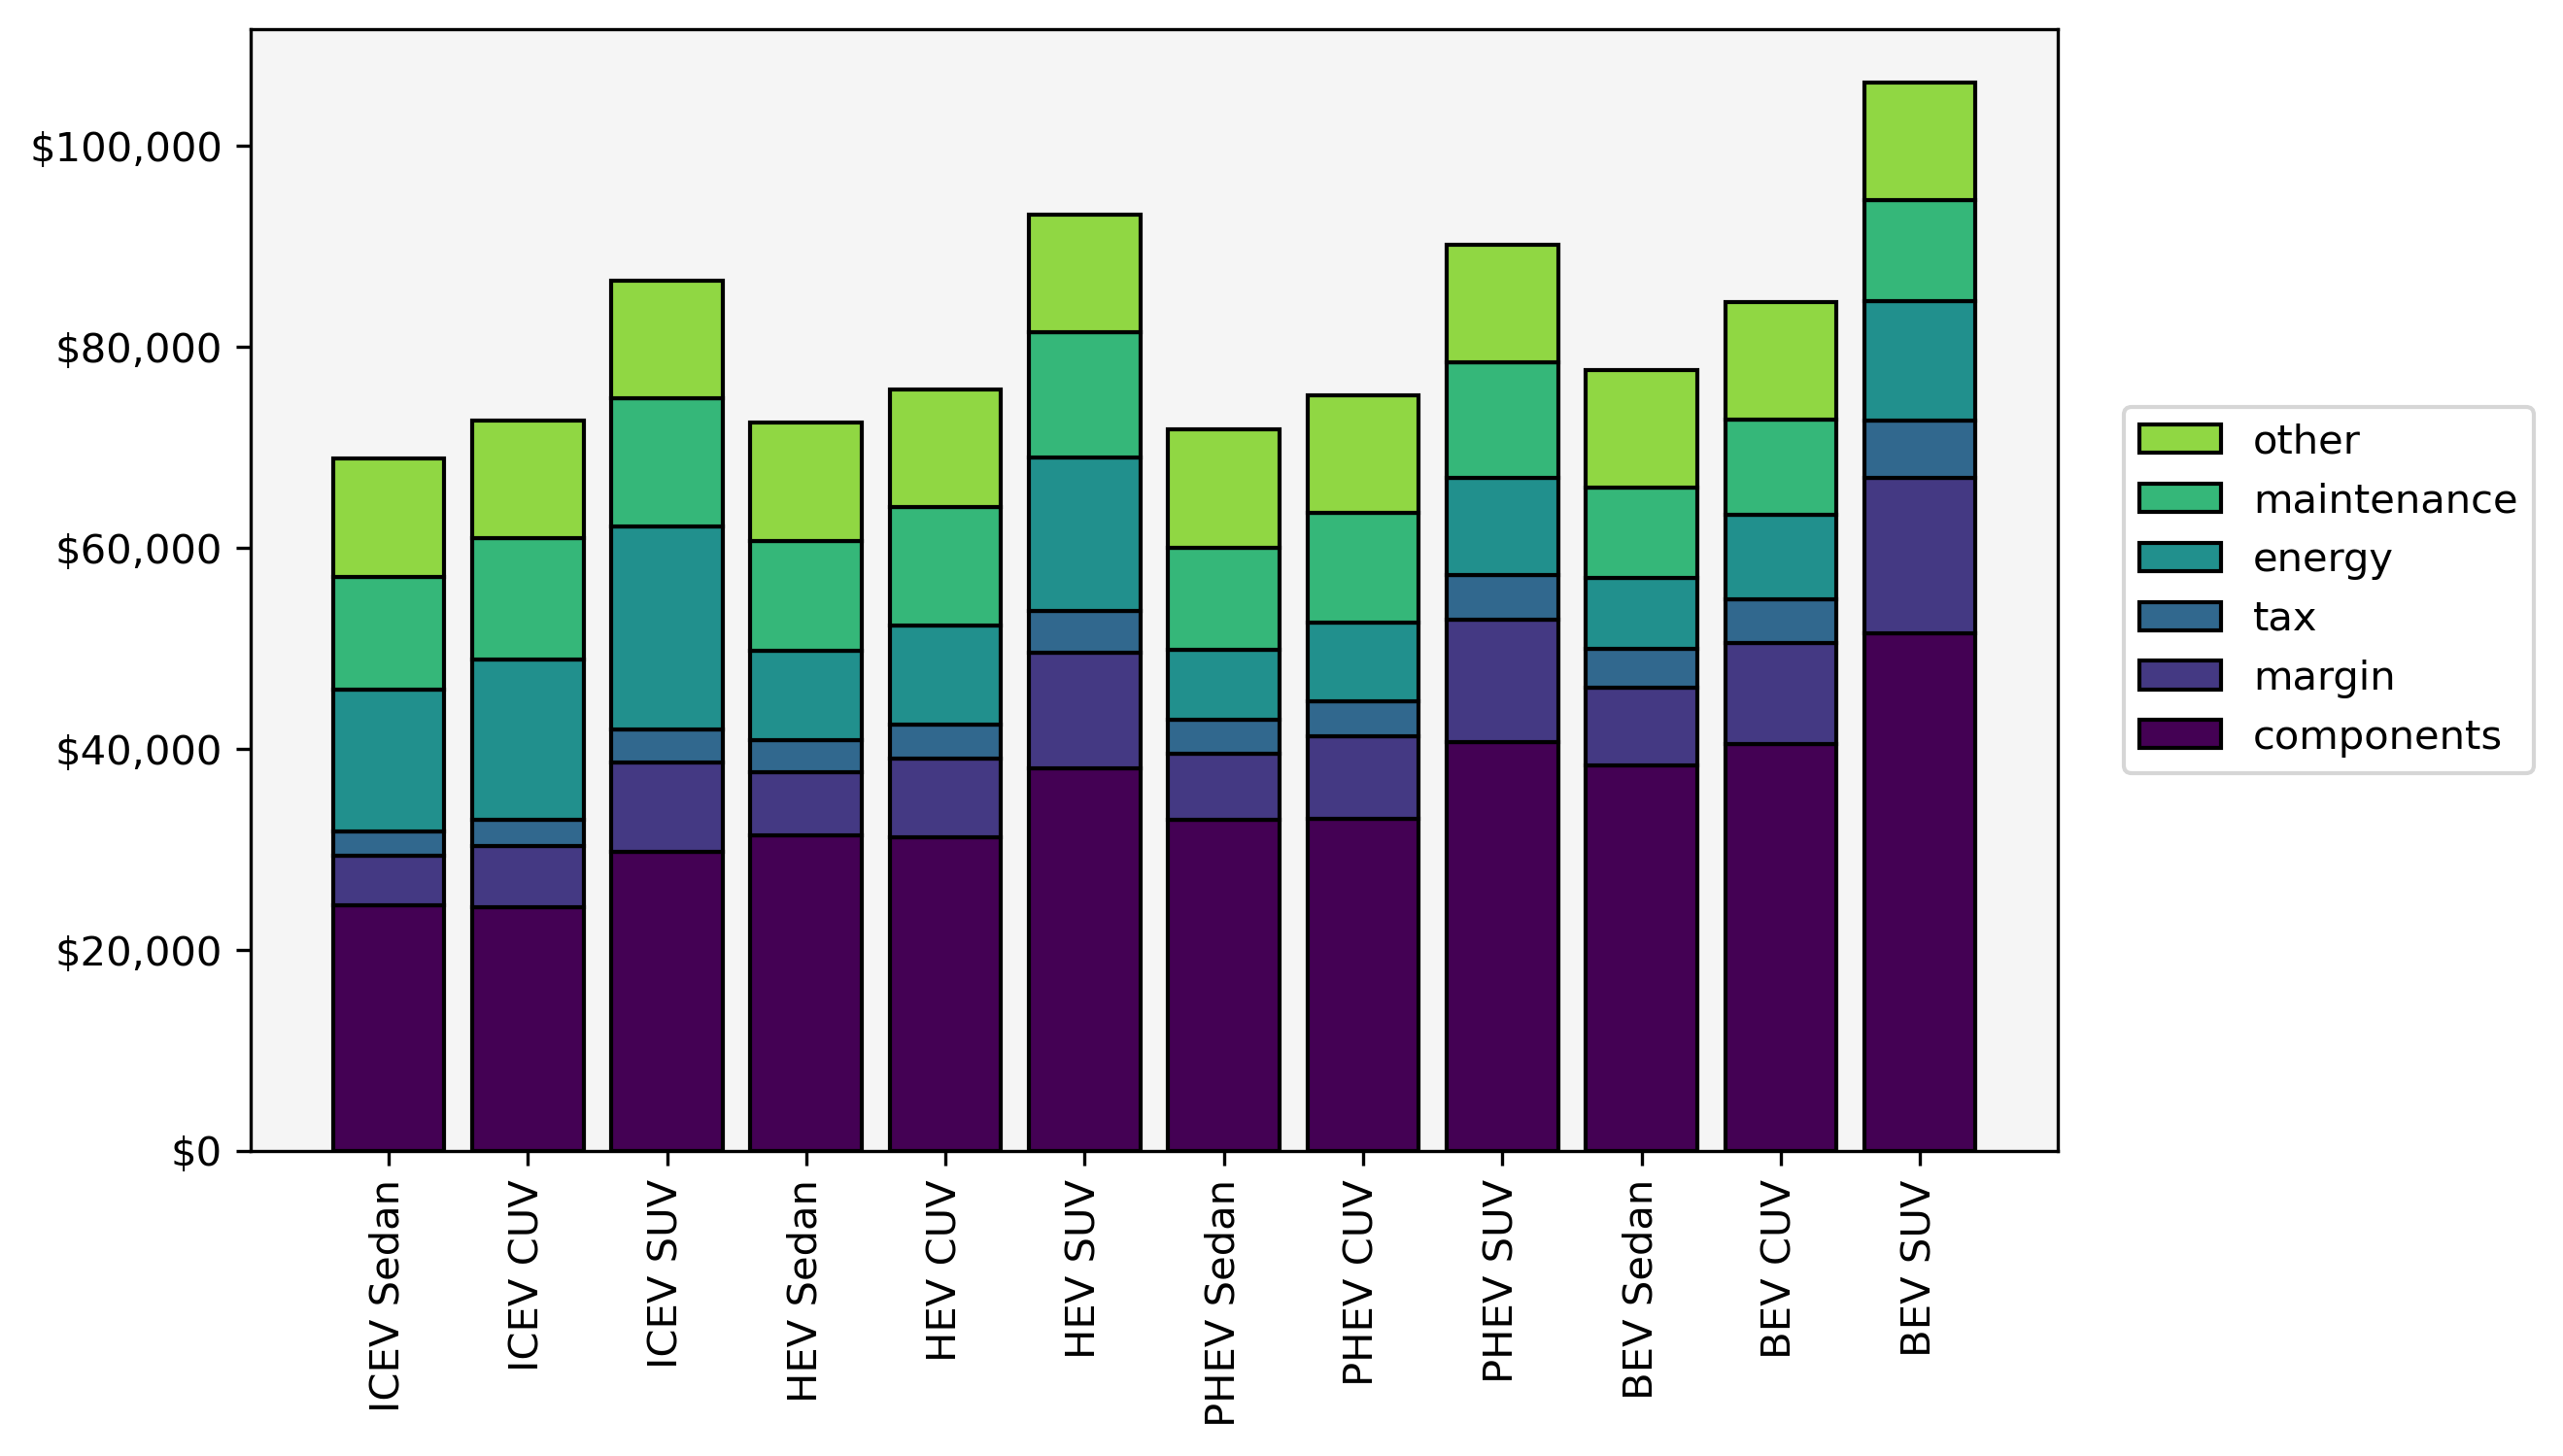

In [21]:
deep_reload(src)

tco=LoadDefaults()

fields=['components','margin','tax','energy','maintenance','other']

data_dict={}

for field in fields:
    data_dict[field]=[]
    for key in tco.keys():
        data_dict[field].append(tco[key].costs[field])

fig,ax=plt.subplots(figsize=(8,5),dpi=300)

axes_kwargs={}

bar_kwargs={
    'ec':'k'
}

legend_kwargs={
    'bbox_to_anchor':(1.15,.5),
    'loc':'center'
}

src.figures.PlotStackedBar(
    data_dict,ax=ax,
    axes_kwargs=axes_kwargs,
    legend_kwargs=legend_kwargs,
    bar_kwargs=bar_kwargs)

labels=([f'{pt} {cs}' for pt in ['ICEV','HEV','PHEV','BEV']\
                   for cs in ['Sedan','CUV','SUV']])
_=ax.set_xticks(list(range(12)),labels,rotation=90)
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.set_facecolor('whitesmoke')

fig.savefig(figure_save_path+'TCO_2024_All.png')

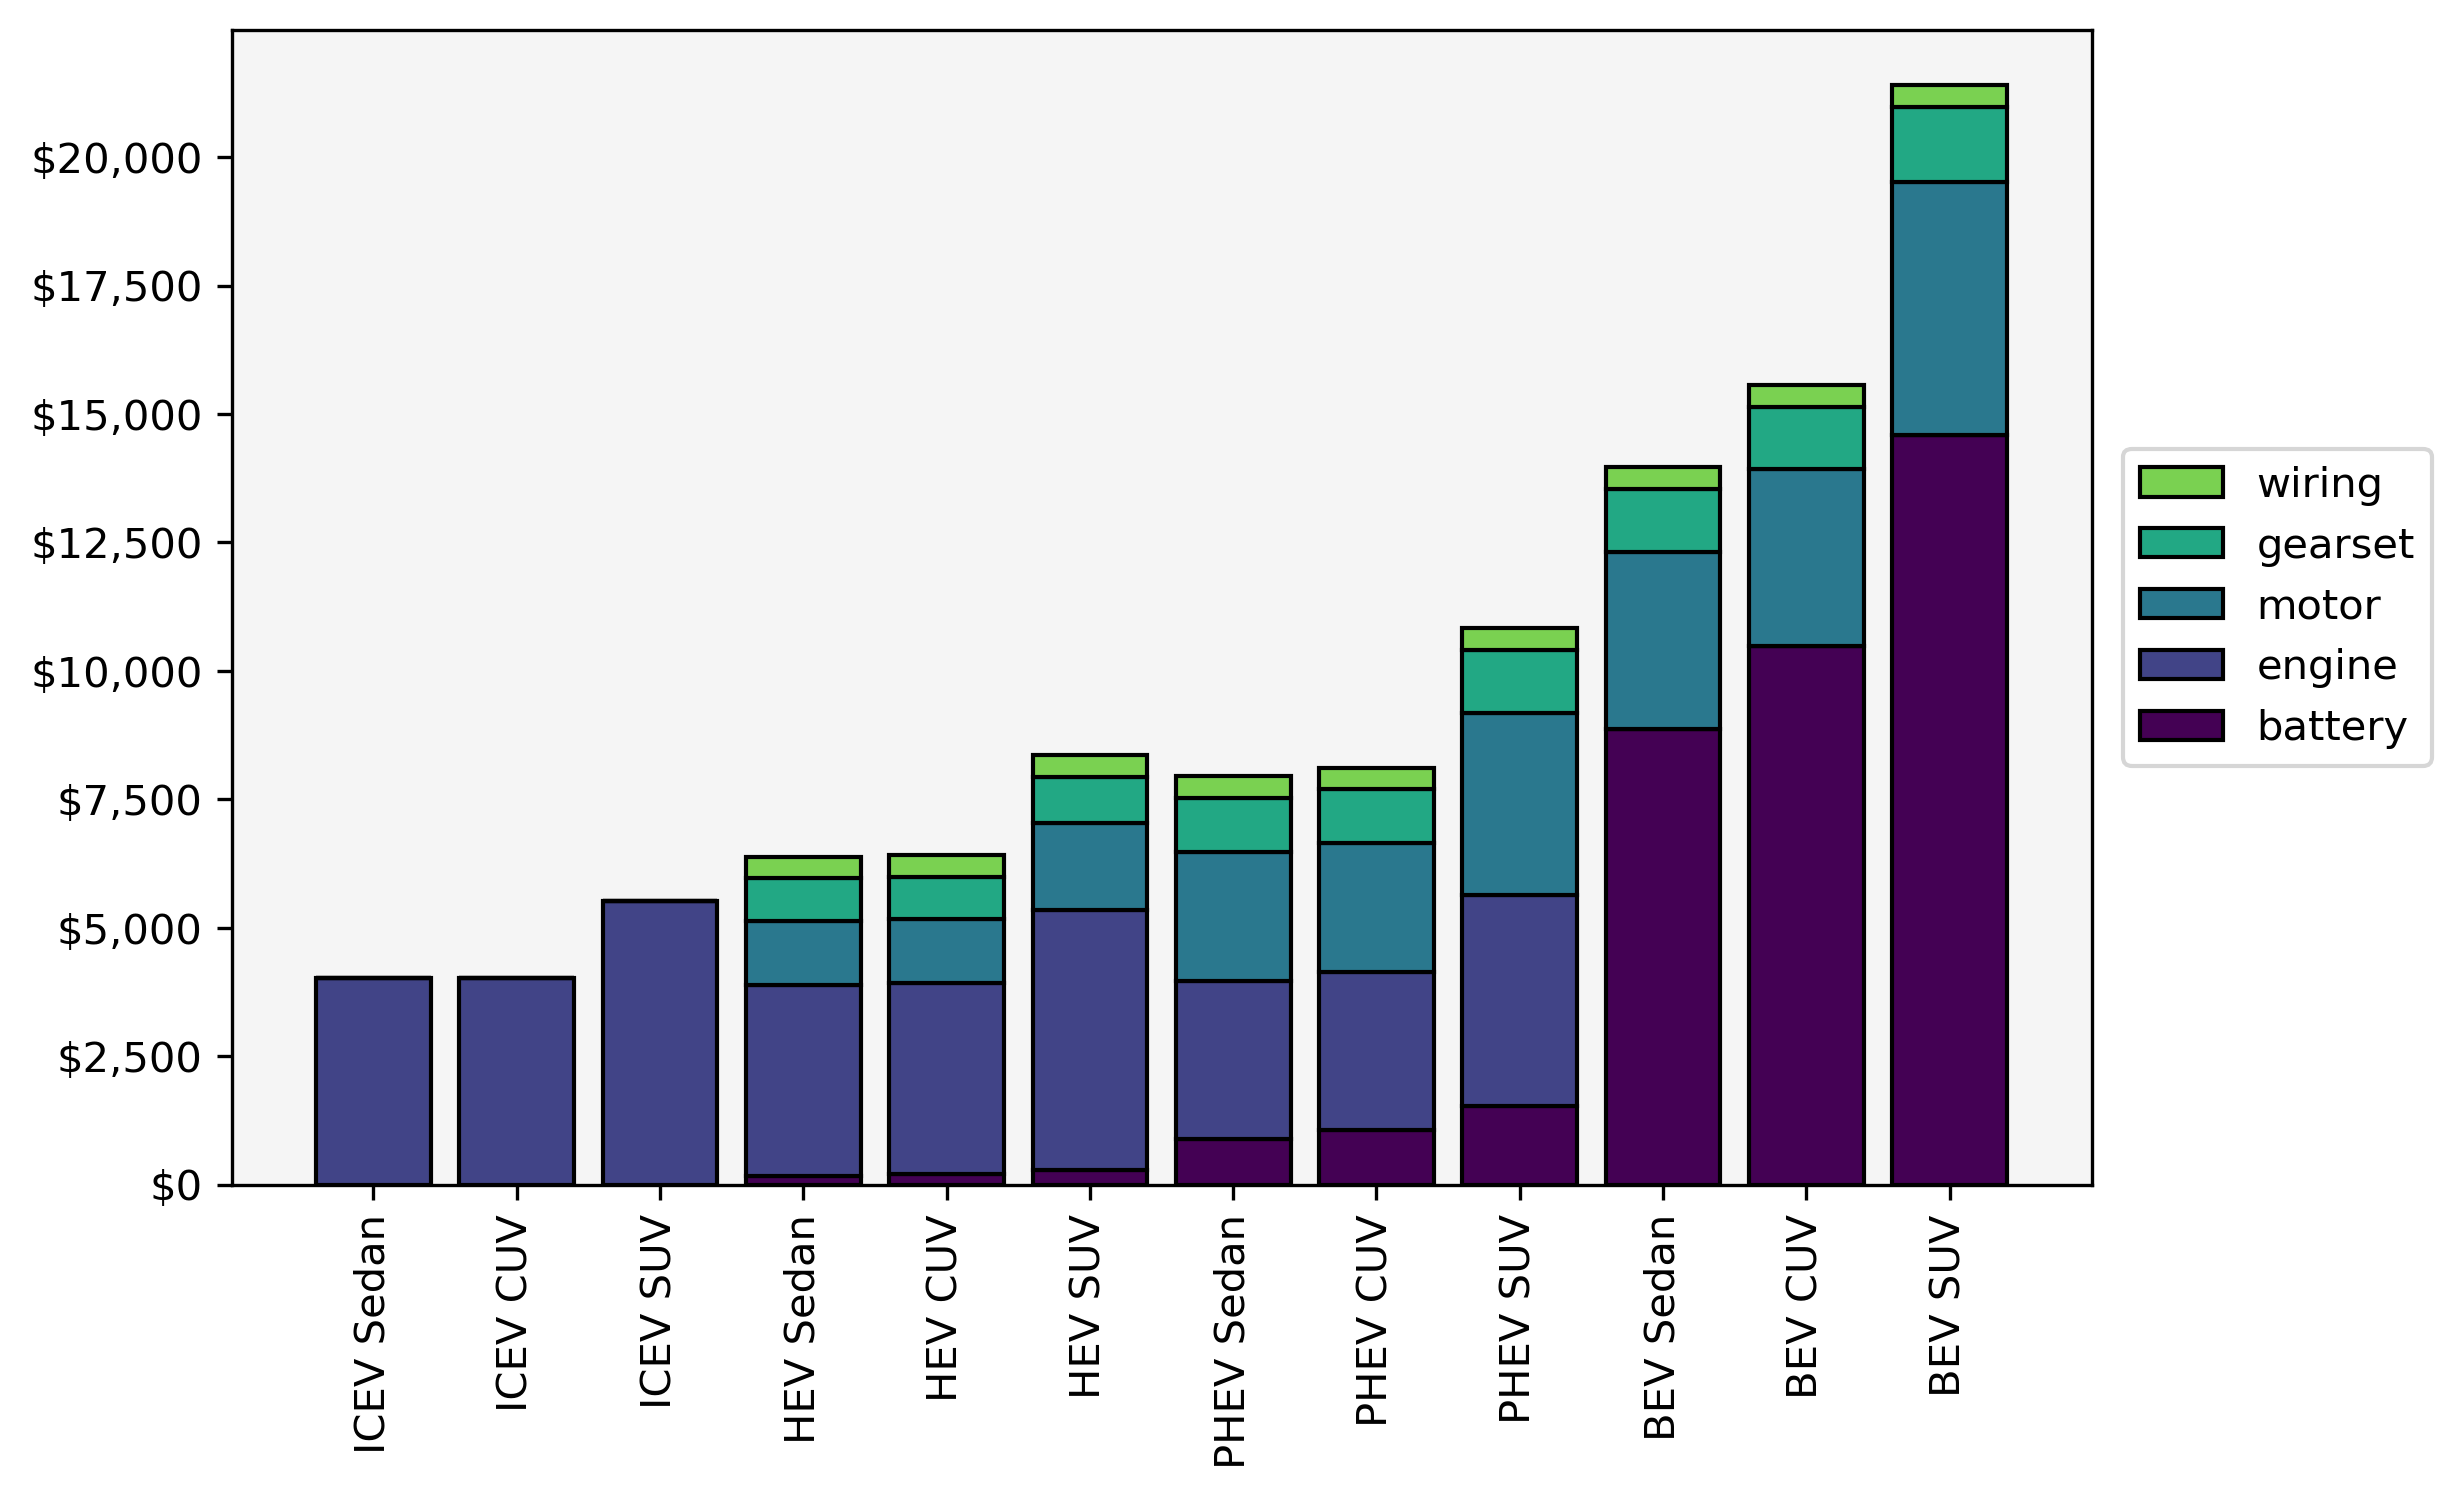

In [24]:
deep_reload(src)

tco=LoadDefaults()

fields=(['battery','engine','motor','gearset','wiring'])

data_dict={}

for field in fields:
    data_dict[field]=[]
    for key in tco.keys():
        data_dict[field].append(tco[key].costs[field])

fig,ax=plt.subplots(figsize=(8,5),dpi=300)

axes_kwargs={}

bar_kwargs={
    'ec':'k'
}

legend_kwargs={
    'bbox_to_anchor':(1.1,.5),
    'loc':'center'
}

src.figures.PlotStackedBar(
    data_dict,ax=ax,
    axes_kwargs=axes_kwargs,
    legend_kwargs=legend_kwargs,
    bar_kwargs=bar_kwargs)

labels=([f'{pt} {cs}' for pt in ['ICEV','HEV','PHEV','BEV']\
                   for cs in ['Sedan','CUV','SUV']])
_=ax.set_xticks(list(range(12)),labels,rotation=90)
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.set_facecolor('whitesmoke')

fig.savefig(figure_save_path+'Powertrain_2024_All.png')

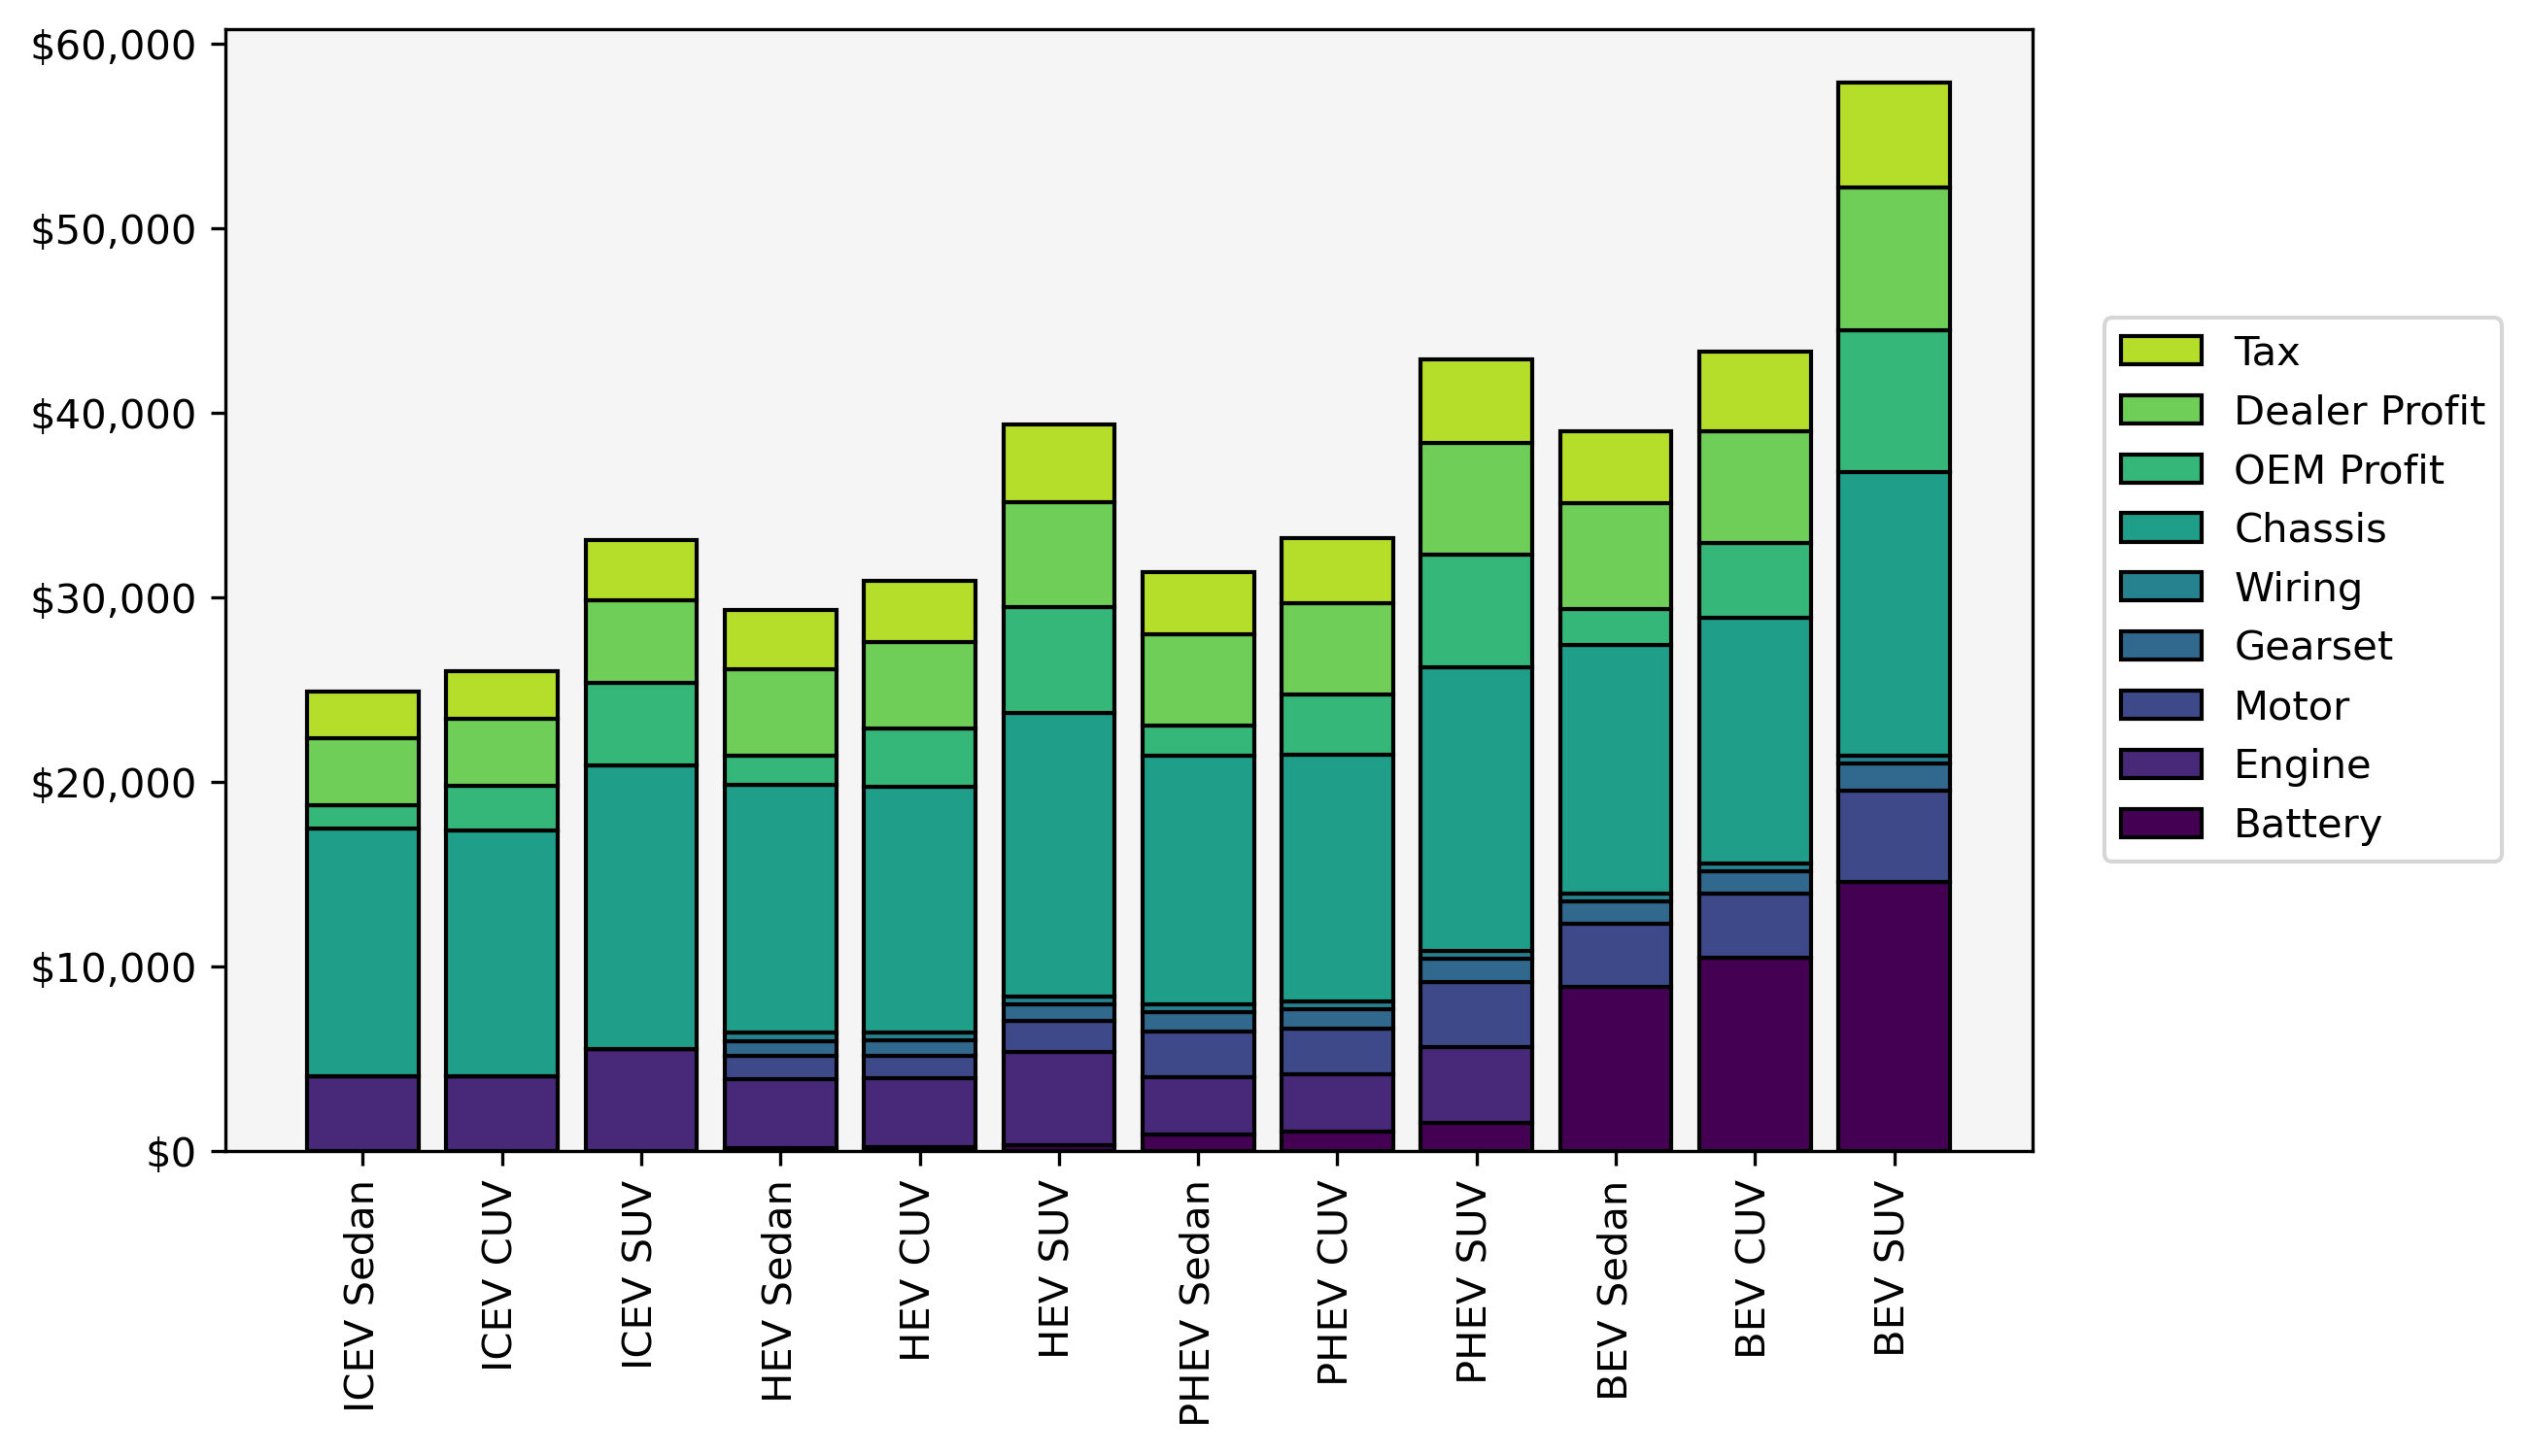

In [26]:
deep_reload(src)

tco=LoadDefaults()

fields=({'battery':'Battery',
         'engine':'Engine',
         'motor':'Motor',
         'gearset':'Gearset',
         'wiring':'Wiring',
         'chassis':'Chassis',
         'oem_profit':'OEM Profit',
         'dealer_profit':'Dealer Profit',
         'tax':'Tax'})

data_dict={}

for field,field_name in fields.items():
    data_dict[field_name]=[]
    for key in tco.keys():
        data_dict[field_name].append(tco[key].costs[field])

fig,ax=plt.subplots(figsize=(8,5),dpi=300)

axes_kwargs={}

bar_kwargs={
    'ec':'k'
}

legend_kwargs={
    'bbox_to_anchor':(1.15,.5),
    'loc':'center'
}

src.figures.PlotStackedBar(
    data_dict,ax=ax,
    axes_kwargs=axes_kwargs,
    legend_kwargs=legend_kwargs,
    bar_kwargs=bar_kwargs)

labels=([f'{pt} {cs}' for pt in ['ICEV','HEV','PHEV','BEV']\
                   for cs in ['Sedan','CUV','SUV']])
_=ax.set_xticks(list(range(12)),labels,rotation=90)

ax.yaxis.set_major_formatter('${x:,.0f}')
ax.set_facecolor('whitesmoke')

fig.savefig(figure_save_path+'Purchase_2024_All.png')

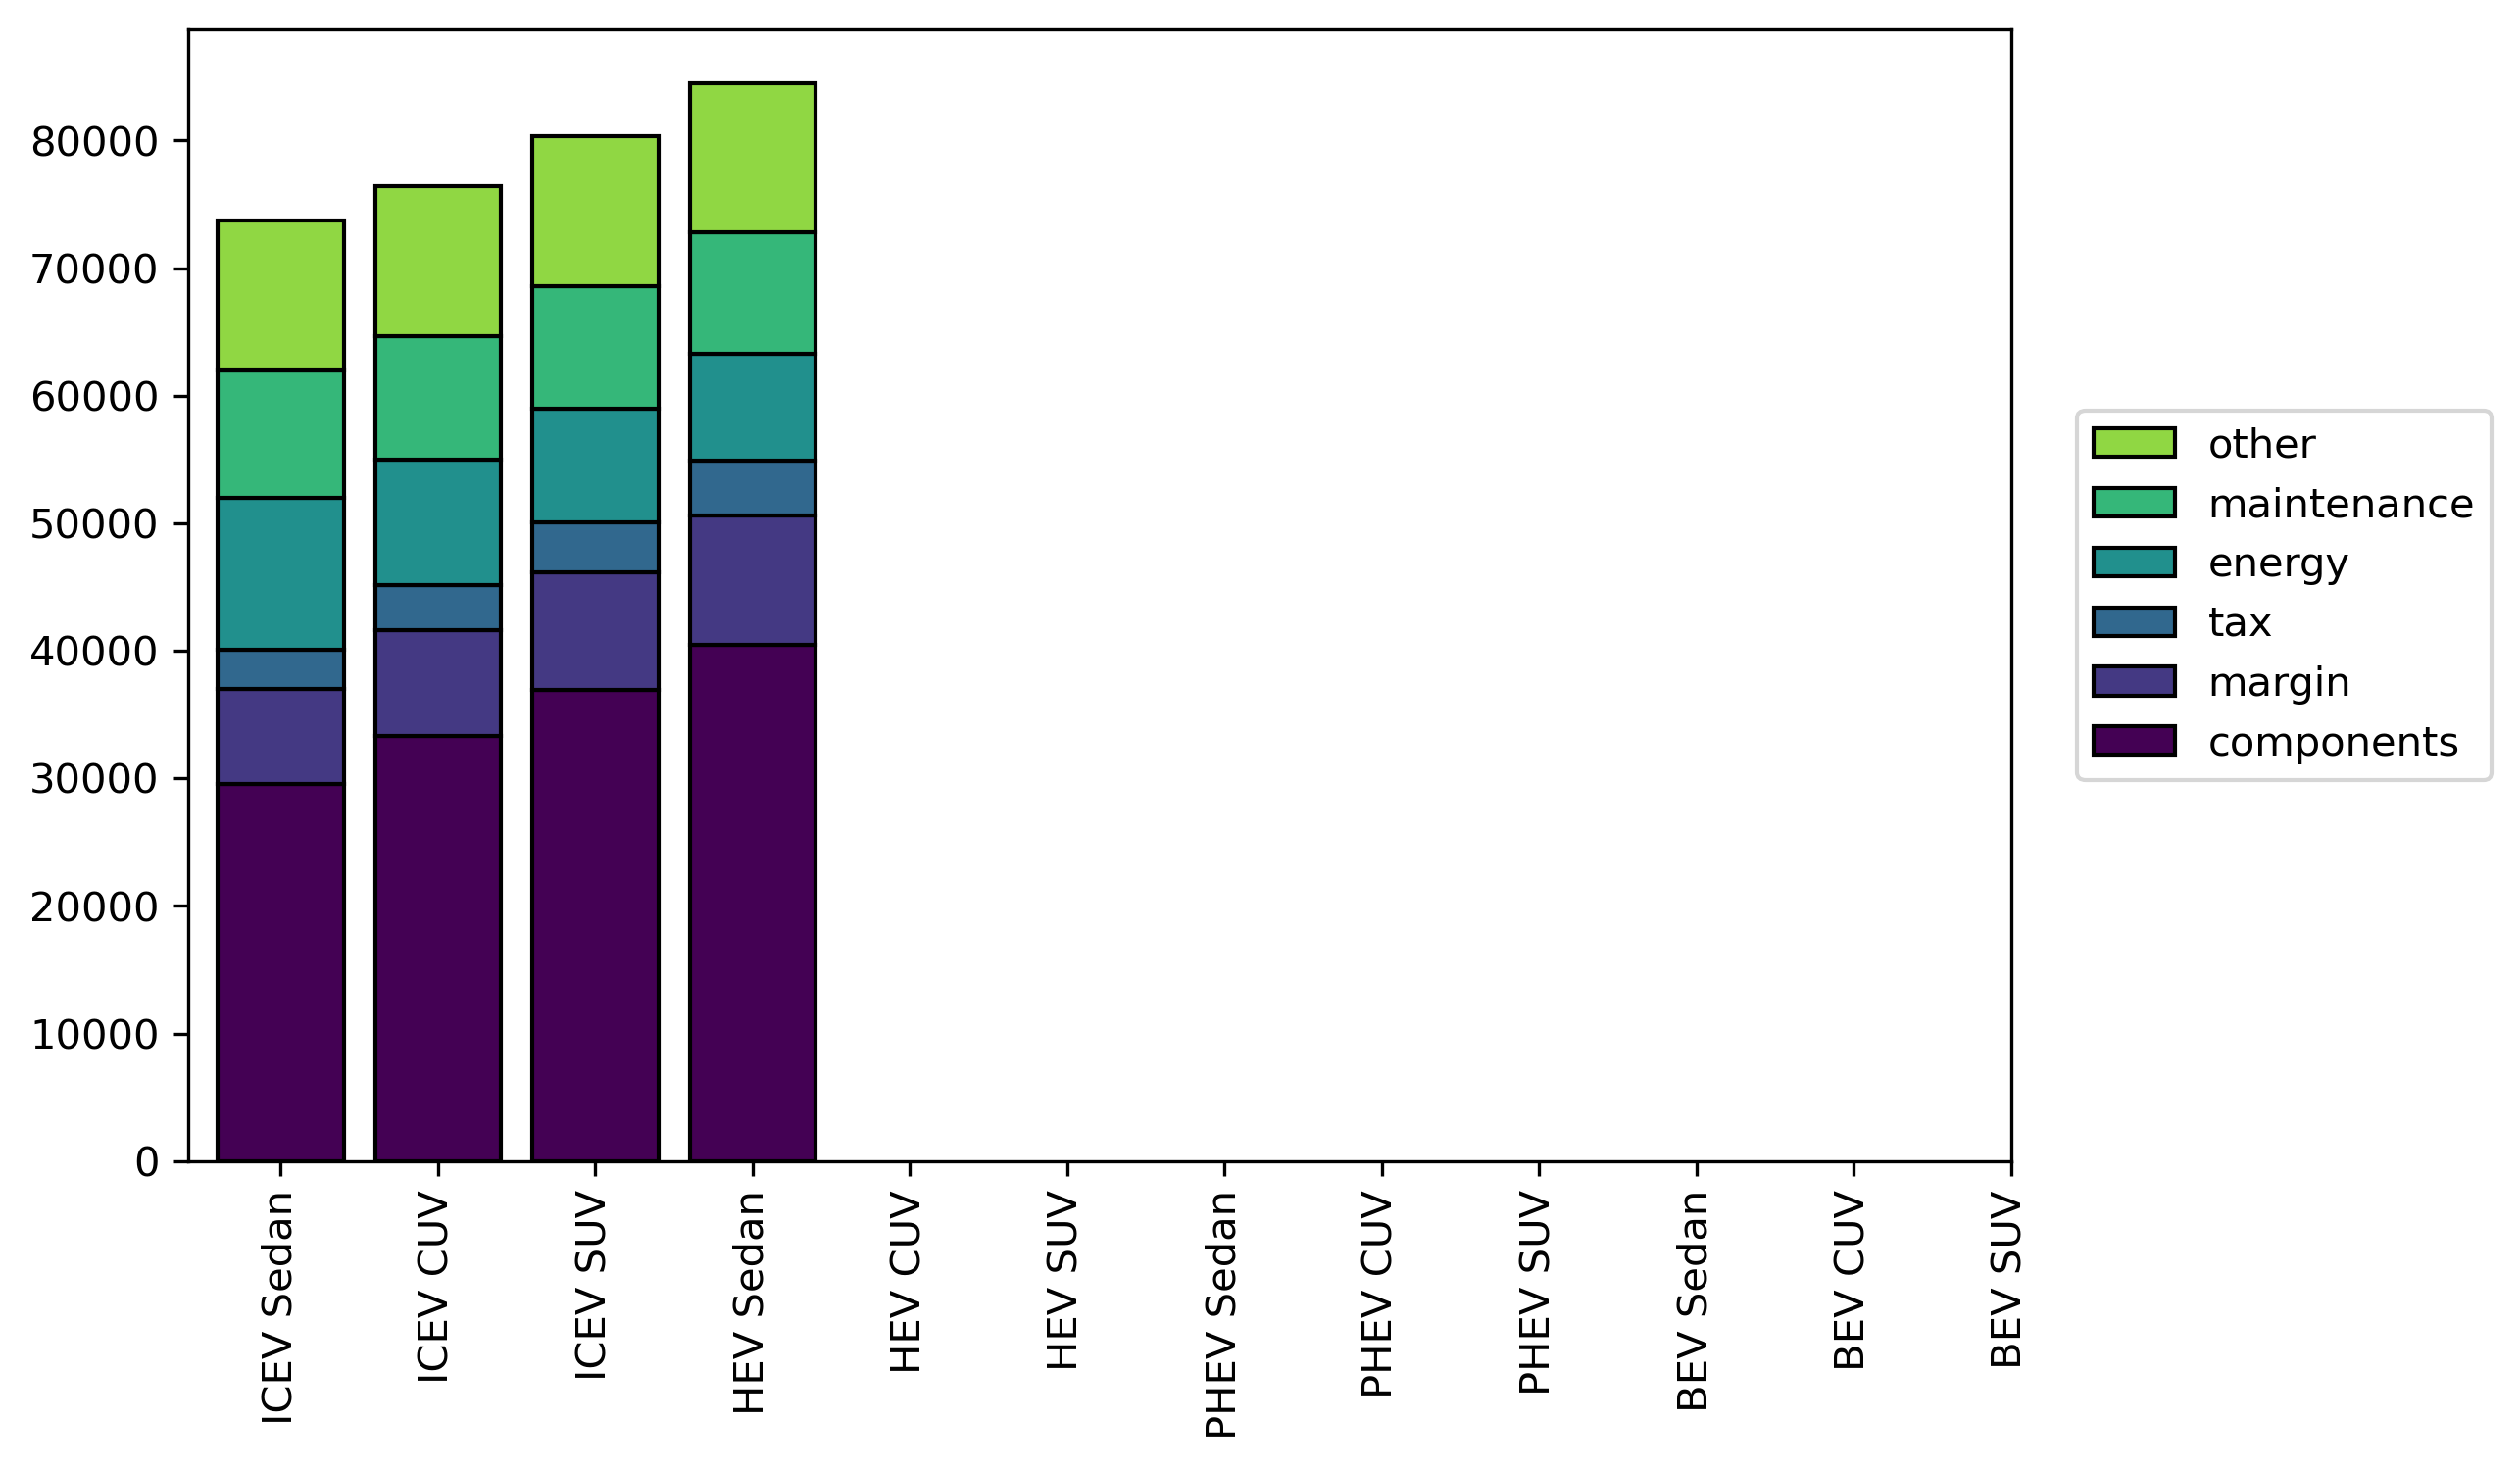

In [160]:
deep_reload(src)

parameters_phev_cuv=parameters.parameters_phev_cuv

tco={}

tco['bev_cuv_100']=src.cost.Vehicle(
    parameters.parameters_bev_cuv,
    {'all_electric_range':100e3},
)

tco['bev_cuv_200']=src.cost.Vehicle(
    parameters.parameters_bev_cuv,
    {'all_electric_range':200e3},
)

tco['bev_cuv_300']=src.cost.Vehicle(
    parameters.parameters_bev_cuv,
    {'all_electric_range':300e3},
)

tco['bev_cuv_400']=src.cost.Vehicle(
    parameters.parameters_bev_cuv,
    {'all_electric_range':400e3},
)

fields=['components','margin','tax','energy','maintenance','other']

data_dict={}

for field in fields:
    data_dict[field]=[]
    for key in tco.keys():
        data_dict[field].append(tco[key].costs[field])

fig,ax=plt.subplots(figsize=(8,5),dpi=300)

axes_kwargs={}

bar_kwargs={
    'ec':'k'
}

legend_kwargs={
    'bbox_to_anchor':(1.15,.5),
    'loc':'center'
}

src.figures.PlotStackedBar(
    data_dict,ax=ax,
    axes_kwargs=axes_kwargs,
    legend_kwargs=legend_kwargs,
    bar_kwargs=bar_kwargs)

labels=([f'{pt} {cs}' for pt in ['ICEV','HEV','PHEV','BEV']\
                   for cs in ['Sedan','CUV','SUV']])
_=ax.set_xticks(list(range(12)),labels,rotation=90)

In [174]:
# Making a contour plot
deep_reload(src)

# years=np.linspace(2024,2035,15)
n=100

all_electric_range=np.linspace(0,500,n)*1e3
fuel_cost=np.linspace(2,6,n)/33.7/3.6e6

tco={
    'icev':np.zeros((n,n)),
    'hev':np.zeros((n,n)),
    'phev':np.zeros((n,n)),
    'bev':np.zeros((n,n)),
}

for idx0 in range(n):
    for idx1 in range(n):
        
        inputs={
            'fuel_cost':fuel_cost[idx0],
        }
        # print(inputs)
        
        icev=src.cost.Vehicle(parameters.parameters_icev_cuv,inputs)
        hev=src.cost.Vehicle(parameters.parameters_hev_cuv,inputs)
        
        inputs['all_electric_range']=all_electric_range[idx1]
        
        phev=src.cost.Vehicle(parameters.parameters_phev_cuv,inputs)
        bev=src.cost.Vehicle(parameters.parameters_bev_cuv,inputs)
        # print(icev.costs['total'],hev.costs['total'],
        #       phev.costs['total'],bev.costs['total'])
        # break
        
        tco['icev'][idx0,idx1]=icev.costs['total']
        tco['hev'][idx0,idx1]=hev.costs['total']
        tco['phev'][idx0,idx1]=phev.costs['total']
        tco['bev'][idx0,idx1]=bev.costs['total']

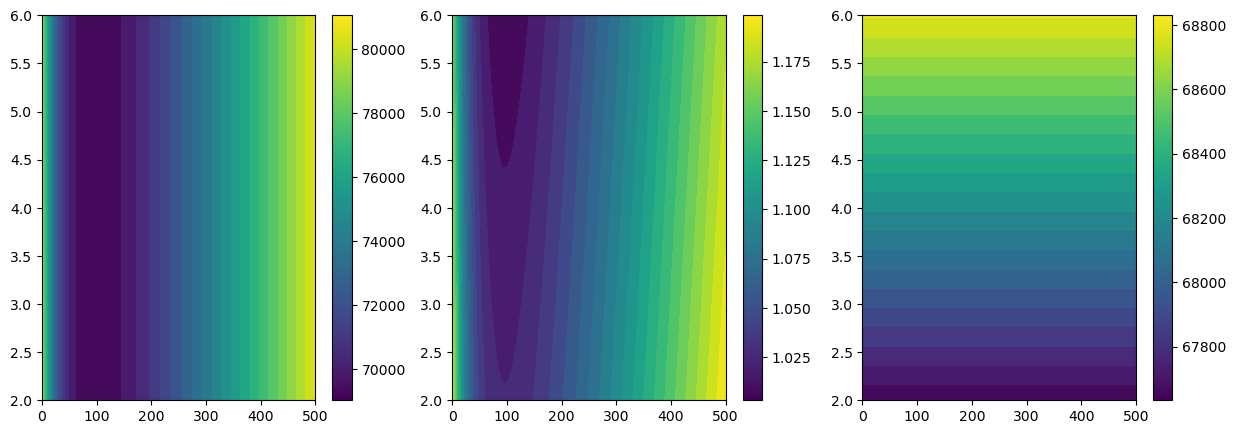

In [175]:
deep_reload(src)

fig,ax=plt.subplots(1,3,figsize=(15,5))

x=all_electric_range/1e3
y=fuel_cost*33.7*3.6e6

z=tco['bev']
src.figures.PlotContour(x,y,z,ax=ax[0],contourf_kwargs={'levels':20})

z=tco['bev']/tco['icev']
src.figures.PlotContour(x,y,z,ax=ax[1],contourf_kwargs={'levels':20})

z=tco['icev']
src.figures.PlotContour(x,y,z,ax=ax[2],contourf_kwargs={'levels':20})

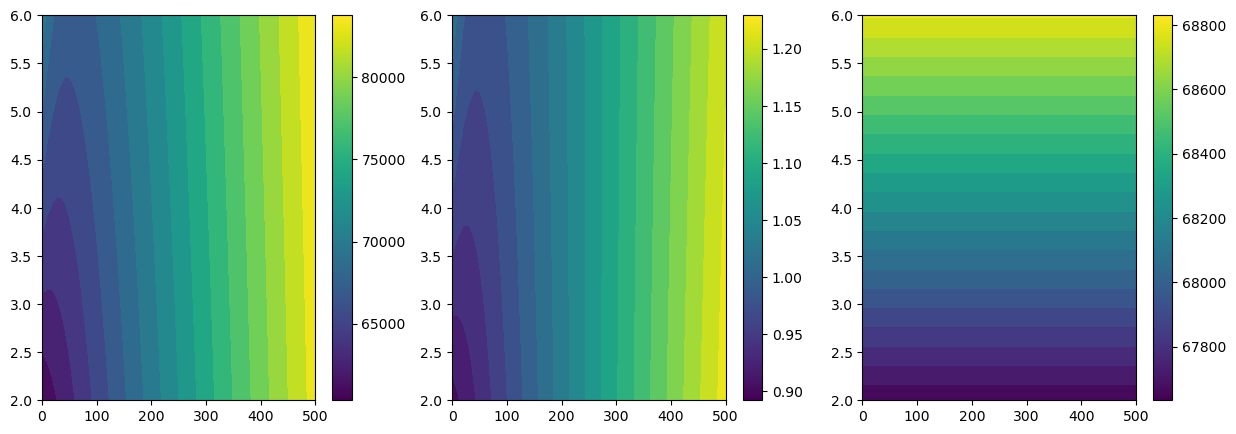

In [176]:
deep_reload(src)

fig,ax=plt.subplots(1,3,figsize=(15,5))

x=all_electric_range/1e3
y=fuel_cost*33.7*3.6e6

z=tco['phev']
src.figures.PlotContour(x,y,z,ax=ax[0],contourf_kwargs={'levels':20})

z=tco['phev']/tco['icev']
src.figures.PlotContour(x,y,z,ax=ax[1],contourf_kwargs={'levels':20})

z=tco['icev']
src.figures.PlotContour(x,y,z,ax=ax[2],contourf_kwargs={'levels':20})

Text(0, 0.5, 'Gasoline Price per Gallon (US) [$]')

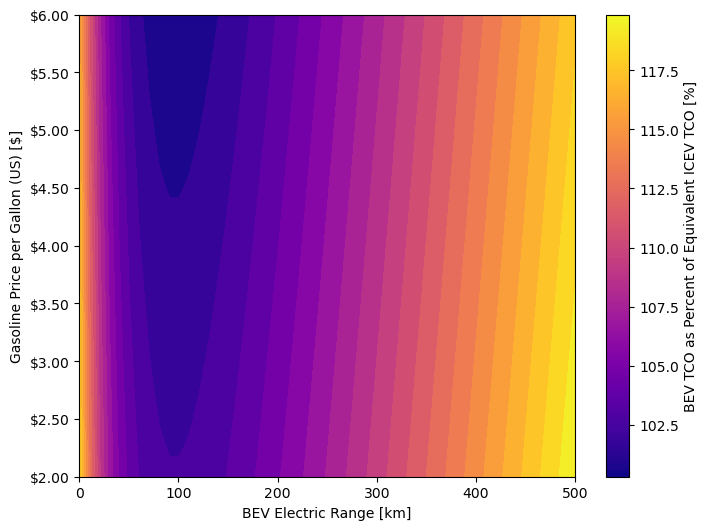

In [210]:
deep_reload(src)

fig,ax=plt.subplots(1,1,figsize=(8,6))

x=all_electric_range/1e3
y=fuel_cost*33.7*3.6e6
z=(tco['bev']-tco['icev'])/tco['icev']*100+100

contourf_kwargs={
    'levels':20,
}

colorbar_kwargs={
    'label':'BEV TCO as Percent of Equivalent ICEV TCO [%]',
    # 'format':"{x:,.1\%}",
}

cmap=src.figures.ReturnColorMap('plasma')

src.figures.PlotContour(
    x,y,z,ax=ax,cmap=cmap,
    contourf_kwargs=contourf_kwargs,
    contour_kwargs=contour_kwargs,
    colorbar_kwargs=colorbar_kwargs,
)

ax.yaxis.set_major_formatter('${x:1.2f}')
ax.set_xlabel('BEV Electric Range [km]')
ax.set_ylabel('Gasoline Price per Gallon (US) [$]')

In [216]:
# Making a contour plot
deep_reload(src)

# years=np.linspace(2024,2035,15)
n=100

all_electric_range=np.linspace(0,100,n)*1e3
fuel_cost=np.linspace(2,6,n)/33.7/3.6e6

tco={
    'icev':np.zeros((n,n)),
    'hev':np.zeros((n,n)),
    'phev':np.zeros((n,n)),
    'bev':np.zeros((n,n)),
}

uf={
    'icev':np.zeros((n,n)),
    'hev':np.zeros((n,n)),
    'phev':np.zeros((n,n)),
    'bev':np.zeros((n,n)),
}

for idx0 in range(n):
    for idx1 in range(n):
        
        inputs={
            'fuel_cost':fuel_cost[idx0],
        }
        # print(inputs)
        
        icev=src.cost.Vehicle(parameters.parameters_icev_cuv,inputs)
        hev=src.cost.Vehicle(parameters.parameters_hev_cuv,inputs)
        
        inputs['all_electric_range']=all_electric_range[idx1]
        
        phev=src.cost.Vehicle(parameters.parameters_phev_cuv,inputs)
        bev=src.cost.Vehicle(parameters.parameters_bev_cuv,inputs)
        # print(icev.costs['total'],hev.costs['total'],
        #       phev.costs['total'],bev.costs['total'])
        # break
        
        tco['icev'][idx0,idx1]=icev.costs['total']
        tco['hev'][idx0,idx1]=hev.costs['total']
        tco['phev'][idx0,idx1]=phev.costs['total']
        tco['bev'][idx0,idx1]=bev.costs['total']
        
        uf['icev'][idx0,idx1]=icev.params['utility_factor']
        uf['hev'][idx0,idx1]=hev.params['utility_factor']
        uf['phev'][idx0,idx1]=phev.params['utility_factor']
        uf['bev'][idx0,idx1]=bev.params['utility_factor']

Text(0, 0.5, 'Gasoline Price per Gallon (US) [$]')

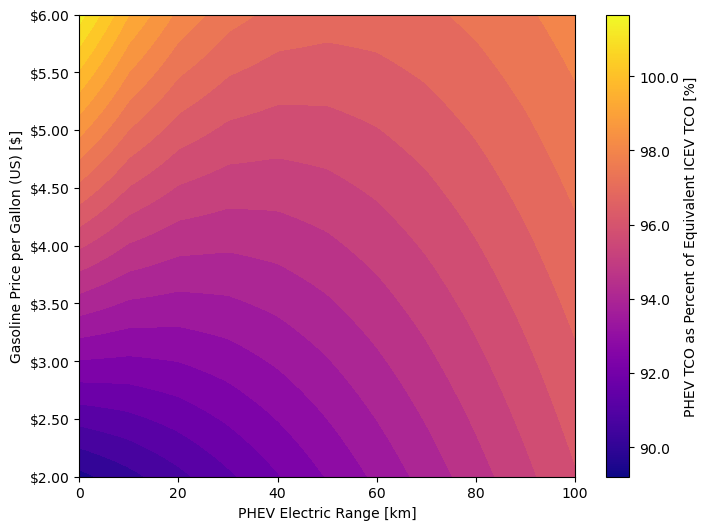

In [215]:
deep_reload(src)

fig,ax=plt.subplots(1,1,figsize=(8,6))

x=all_electric_range/1e3
y=fuel_cost*33.7*3.6e6
z=(tco['phev']-tco['icev'])/tco['icev']*100+100

contourf_kwargs={
    'levels':20,
}

colorbar_kwargs={
    'label':'PHEV TCO as Percent of Equivalent ICEV TCO [%]',
    'format':"{x:.1f}",
}

cmap=src.figures.ReturnColorMap('plasma')

src.figures.PlotContour(
    x,y,z,ax=ax,cmap=cmap,
    contourf_kwargs=contourf_kwargs,
    contour_kwargs=contour_kwargs,
    colorbar_kwargs=colorbar_kwargs,
)

ax.yaxis.set_major_formatter('${x:1.2f}')
ax.set_xlabel('PHEV Electric Range [km]')
ax.set_ylabel('Gasoline Price per Gallon (US) [$]')

Text(0, 0.5, 'Gasoline Price per Gallon (US) [$]')

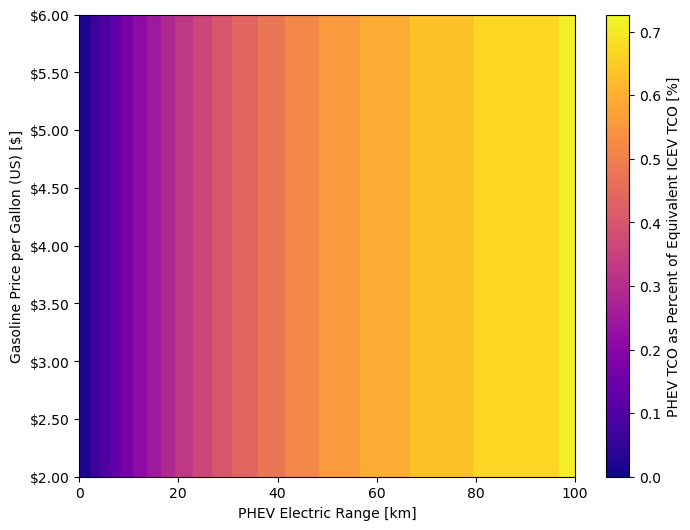

In [217]:
deep_reload(src)

fig,ax=plt.subplots(1,1,figsize=(8,6))

x=all_electric_range/1e3
y=fuel_cost*33.7*3.6e6
z=uf['phev']

contourf_kwargs={
    'levels':20,
}

colorbar_kwargs={
    'label':'PHEV TCO as Percent of Equivalent ICEV TCO [%]',
    'format':"{x:.1f}",
}

cmap=src.figures.ReturnColorMap('plasma')

src.figures.PlotContour(
    x,y,z,ax=ax,cmap=cmap,
    contourf_kwargs=contourf_kwargs,
    contour_kwargs=contour_kwargs,
    colorbar_kwargs=colorbar_kwargs,
)

ax.yaxis.set_major_formatter('${x:1.2f}')
ax.set_xlabel('PHEV Electric Range [km]')
ax.set_ylabel('Gasoline Price per Gallon (US) [$]')